<h1>Table of Contents:</h1>
<ol>
    <li><a href="#0">Uploading the files Uploading files and importing libreries</a></li>
    <li><a href="#1">Task A - Implementation of the models:<a>
        <ol>
    <li><a href="#1.1">KNN</a></li>
    <li><a href="#1.2">ANN</a></li>
        </ol>   </li>
<li><a href="#2">Task B - Running KNN</a></li>
<li><a href="#3">Task C - Running ANN:</a>
    <ol>
    <li><a href="#3.1">Run for different pairs of K and L</a></li>
    <li><a href="#3.2">Calculate the ratio and display the results on the images</a></li>
    <li><a href="#3.3">The comparison between the results of the KNN and the results of the ANN according to:</a></li>
        <ol>
        <li><a href="#3.3.1">running time</a></li>
        <li><a href="#3.3.2">Comparing errors</a></li>
            </ol></ol>
     </li>
<li><a href="#4">Task D - comparing the results with the model in the sklearn library</a></li>
<li><a href="#5">Task E - predicting the image from which the point was taken</a></li>
        </ol>
        <h2><a  href="#b">Bonus:</a></h2>
<ol>
<li><a href="#b1">ANN implementation using the KDTREE method</a></li>
<li><a href="#b2">Running ANN:</a>
    <ol>
    <li><a href="#b2.1">Run for different pairs of N0 and L0</a></li>
    <li><a href="#b2.2">Calculate the ratio and display the results on the images</a></li>
    <li><a href="#b2.3">The comparison between the results of the KNN and the results of the ANN according to:</a>
        <ol>
        <li><a href="#b2.3.1">running time</a></li>
            <li><a href="#b2.3.2">Comparing errors</a></li>
        </ol></li>
   </ol></ol>


<p id="0">
<h1>Uploading the files Uploading files and importing libreries: </h1>
<h2>Libraries</h2>
</p>

In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import random
import timeit
import time
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import math
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import glob, os

<h2> Data</h2>
Befoer we begin we need to add labels to the data:
<ol><li>Class - seperating between Hananya and Hashmal for prediction</li>
    <li>Label - serial index of the row in the csv</li></ol>

In [2]:
Hananya1 = pd.read_csv('Hananya1.csv')
Hananya2 = pd.read_csv('Hananya2.csv')
Hashmal1 = pd.read_csv('Hashmal1.csv')
Hashmal2 = pd.read_csv('Hashmal2.csv')

In [3]:
#Inserting Class - Hananya or Hashmal
Hananya1.insert(4, 'classification', 'Hananya')
Hananya2.insert(4, 'classification', 'Hananya')
Hashmal1.insert(4, 'classification', 'Hashmal')
Hashmal2.insert(4, 'classification', 'Hashmal')

#Inserting label
Hananya1.insert(5,'label', Hananya1.index.values)
Hananya2.insert(5,'label', Hananya2.index.values)
Hashmal1.insert(5,'label', Hashmal1.index.values)
Hashmal2.insert(5,'label', Hashmal2.index.values)

In [4]:
#The data after inserting the new columns
display(Hananya1.head())
Hananya2.head()

,Y,X,scale,angle,classification,label,feature1,feature2,feature3,feature4,...,feature119,feature120,feature121,feature122,feature123,feature124,feature125,feature126,feature127,feature128
0,191.63,281.10,20.79,1.545,Hananya,0,65,7,0,0,...,0,7,0,0,0,0,1,1,0,0
1,195.73,41.28,6.35,1.458,Hananya,1,52,12,0,0,...,1,18,0,0,0,0,0,0,5,0
2,196.50,150.37,9.14,1.441,Hananya,2,60,15,1,1,...,0,1,7,0,0,0,0,0,0,2
3,198.02,23.67,1.93,1.870,Hananya,3,72,9,0,0,...,23,48,7,0,0,0,0,0,1,10
4,198.24,24.35,1.71,1.845,Hananya,4,80,20,0,0,...,26,53,9,1,0,0,0,0,0,15


,Y,X,scale,angle,classification,label,feature1,feature2,feature3,feature4,...,feature119,feature120,feature121,feature122,feature123,feature124,feature125,feature126,feature127,feature128
0,193.17,371.13,22.83,1.571,Hananya,0,46,13,0,0,...,0,24,0,0,0,10,3,0,0,0
1,331.15,543.32,18.86,1.099,Hananya,1,15,105,32,1,...,0,0,1,12,2,0,0,0,0,0
2,253.43,525.48,21.01,1.512,Hananya,2,47,67,0,0,...,0,5,50,7,2,3,0,0,0,0
3,236.15,239.20,21.35,1.502,Hananya,3,11,6,0,0,...,0,39,87,3,0,0,0,0,0,10
4,201.21,471.74,19.79,1.411,Hananya,4,78,31,0,0,...,0,0,0,1,2,17,0,0,0,0


In [5]:
#create a list of pairs of all the Data with the name:
#first variable is the training data, second is the test data, and third is a label/name of the paired data
#we will use this array to run both samples in each algorithm
data_list=[(Hananya1,Hananya2,'Hananya'),(Hashmal1,Hashmal2,'Hashmal')]

<p id="1"><h1>Task A - Implementation of the models:</h1></p>
<p id="1.1"><h2>1. KNN</h2></p>
The implementation of KNN. By default k=1.
Explanation of the functions:
<ol>
    <li><strong>__init__</strong> - constructor, defines k according to the request (by default to 1)</li>
    <li><strong>fit</strong> - receives the training information and builds the model</li>
<li><strong>kneighbors</strong> - recieves data to be compared with the model, returns for each instance the closest neighbour or neighbours from the training data
    <br>Implemented by running cdist on the training data and the test data (a function in the scipy library that allows comparison of distances between collections). Sorting the results each time for a different row, and cutting the best k.</li>
    <li><strong>predict</strong> -  method that returns for a list of indexes (given as a dataframe) which image they correspond to.</li>
</ol>

In [6]:
class KNN:

    #constractor
    def __init__(self,k=1):
        self.k=k
        self.df=pd.DataFrame()
        self.x_index=0
    
    def fit(self,X,Y):
        self.x_index=len(Y.columns) #x_index is deviding between the label and the features
        self.df=pd.concat([Y.copy(),X.copy()],axis=1)#saves the data
    
    def kneighbors(self,df2):
        results = pd.DataFrame()
        distances = pd.DataFrame(cdist(self.df.iloc[:,self.x_index:].to_numpy(),df2.iloc[:,self.x_index:].to_numpy(),'euclidean'))
        for i in distances.columns:
            col=pd.DataFrame(distances.loc[:,i])
            col.insert(0, 'neighbour', col.index.values) #add labels
            col.rename(columns={i :'distance'}, inplace=True)
            col = col.sort_values(by=['distance']) #sort all neighbors by distance
            col = col.head(self.k).stack().to_frame().reset_index(drop=True).T #keep the closest k neighbors
            results = pd.concat([results, col]) #add nearest neighbors to results DF
        results = results.reset_index(level=0, drop=True)
        return results
    
    def predict(self,df2,classes=None):
        #args:df2-to predict df, classes-a list of possibol classifications
        if(classes==None):
            classes=list(set(self.df.classification.values))#finding all possibol classes if not given
        nearest, count = self.kneighbors(df2)#find neighbors
        end=len(nearest.columns)
        label_to_class = pd.Series(self.df.classification.values, index=self.df.label).to_dict()
        nearest = nearest.replace({'neighbour': label_to_class})#add labels
        for cal in classes:
            nearest[cal] = nearest.apply(lambda row: sum(row[0:-1]==cal) ,axis=1)#counting how many from each class
        nearest['verdict'] =nearest.iloc[:,end:].idxmax(axis=1)#find which class is the max
        return pd.DataFrame(nearest['verdict'])

<a href="#top">Back to top<a>

<p id="1.2"><h2>2. ANN</h2></p>
The implementation of ANN using the LSH method - we chose LSH since we've recieved lower error compared to KDTree<br><ol><li>L = Nubmer of hash tables to build the model on, defult = 2</li><li>K = number of cuts in each table, defult = 10</li> <li>k = number of nearest neighbours to return, defult = 2</li></ol> Note: The cuts are random and will be recreated for each different object of this class. That is, for each run you can get different results.
Explanation of the functions:
<ol>
    <li><strong>__init__</strong>- constructor, defines L, K, k as required</li>
    <br><li><strong>fit</strong> - receives the training information and performs the following actions on it L times (for L dictionaries):
        <ol>
        <li>Creating cuts from its features using the create_cuts function</li>
    <li>Creating a dictionary based on the lines using the create_dict function</li>
        <li>Cleaning of the information in the dictionary including resetting the indexes and removing duplicates.</li>
        </ol></li>
        <br><li><strong>create_cuts</strong> - Creates a list of cuts by drawing a feature as the slice name and its minimum and maximum value as the cut value</li>
    <br><li><strong>create_dict</strong> - Creating a dictionary (hash table) from the cuts list. For each cell in the table, the key will be a corresponding code, and the value is a dataframe containing all the results with this code from the training information.
<br>Works recursively so that every time it accesses the next slice, it splits the information according to whether it is greater or smaller than the value of the cut and runs on all two dataframes that the split created.</li>
    <br><li><strong>get_code</strong> - Given an observation and a list of sections, creates for this observation a code that represents where it should be found in the dictionary corresponding to these sections. Generating the code by going over the features in the sections and checking whether the value of the observation in this feature is smaller or larger than the corresponding saved section, if smaller or equal, will be chained to code 0, if larger 1.</li>
    <br><li><strong>kneighbors</strong> - receives information for testing and checks in it who are the k closest neighbors to it from the training information.
    <br>Note: returns the index that was in the training data.
    <br>Implementation by finding, for each sample, all the cells in L of the dictionaries to which it belongs and finding the k closest neighbors among them.<br>
Note: There is a possibility that the sample will fall into empty cells in all the dictionaries or that together they do not have k potential neighbors, in such a case a search will be made in all the training information (as in KNN) for it and it will count that no neighbor is found.
The meaning: the error will decrease, but the running time will increase (theoretically).<br>
Additional options that we did not choose to exercise:
<ol><li> search in the nearest cells, meaning: the error will decrease, but the running time will increase (theoretically).</li>
<li> Put a relatively large default value in the distance line, meaning: the error will increase, but the running time will decrease (theoretically).</li></ol>
    <br><li><strong>predict</strong> - method that returns for a list of indexes (given as a dataframe) which image they correspond to.</li>
<ol>

In [7]:
class ANN:
    
    #constractor
    def __init__(self,k=2,K=10,L=2):
        self.k=k
        self.K=K
        self.L=L
        self.annList=[]#will contain all the hash tables
        self.df=pd.DataFrame()#the complete training data
        self.x_index=0
    
    def fit(self,X,Y):
        self.x_index=len(Y.columns)
        self.df=pd.concat([Y.copy(),X.copy()],axis=1)#saves the data
        for i in range(0,self.L):
            cuts=self.create_cuts(X)#list of the cuts per LSH
            dic={}
            self.create_dict(self.df,cuts=cuts,cutNum=0,dic=dic)#create the table
            for str1 in dic.keys():
                dic[str1]=dic[str1].reset_index(drop=True).drop_duplicates()
            self.annList.append([cuts,dic]) 
    
    def create_cuts(self,df):
        cuts=[]
        for i in range(0,self.K):
            min1=None
            max1=None
            while(max1==None and min1==None):
                featureName=random.choice(range(self.x_index,len(df.columns)))#randomly choose a feature
                #to pick the value that will create the cut in the randomly chosen feature, we look at the range of that feature
                #and randomly derive a cut value
                min1=df.iloc[:,featureName].min()
                max1=df.iloc[:,featureName].max()
            #In order not to have all data in the same cut, which will happen if the value is either the min or max value of that feature.
            #We add 1 to min
            range1 = list(range(int(min1)+1,int(max1)))
            if len(range1) == 0:#if min/max value are equal
                cut_val = df.iloc[:,featureName].min()
            else:
                cut_val=random.choice(range1)
            cuts.append([featureName,cut_val])
        return cuts
    
    def create_dict(self,df,cuts,cutNum,dic):
        if(len(df)<=0):
            #If the dataframe is empty, there is nothing to save for this part.
            return
        if (cutNum>=len(cuts)):
            #If we have gone through all the sections,
            #we will find out what the code corresponds to this cell and we will add them to the dictionary
            code=self.get_code(df.iloc[0,:],cuts)
            dic[code]=df
            return
        cut=cuts[cutNum]#Find the current slice (pair of cut name and value)
        #Splitting the data according to who is smaller and who is greater than the cut value
        df2 = df[df.iloc[:,cut[0]] < cut[1]]
        df3 = df[df.iloc[:,cut[0]] >= cut[1]]
        #Running the function for each part of the data
        self.create_dict(df2,cuts,cutNum+1,dic)
        self.create_dict(df3,cuts,cutNum+1,dic)
            
    
    def get_code(self,df,cuts):
        str1=''
        for cut in cuts:
            val=df.iloc[cut[0]]
            if(val>cut[1]):
                str1=str1+'1'
            else:
                str1=str1+'0'
        return str1
    
    def kneighbors(self,df2):
        count=0
        results = pd.DataFrame()
        current = np.empty((0, len(self.df.columns)), float)#initialize array
        #the below loop is taking each row in the data and calculating the K nearest kneighbors, one data row at a time
        for rowNum,row in df2.iterrows(): #run on all data, row by row
            for ann in self.annList:#run on all tables
                cuts=ann[0]
                dic=ann[1] 
                code=self.get_code(df2.iloc[rowNum,:],cuts)
                if code in dic.keys():
                    current = np.vstack((current, dic[code]))
            #current=pd.DataFrame(current).drop_duplicates().to_numpy()
            if len(current)<self.k:
                #If the sample ended in a cell with no data/neighbors, we will compare it to all the training data
                current=self.df.to_numpy()
                #Counting that we did not find neighbors for one sample - this is to give feedback on our code
                count=count+1
            d2=df2.iloc[rowNum:rowNum+1,self.x_index:].to_numpy().astype(np.single)
            test=current[:,self.x_index:].astype(np.single)
            nearest = pd.DataFrame(cdist(test,d2,'euclidean')) #calc euclidean distance
            nearest.insert(0, 'neighbour', current[:,self.x_index-1:self.x_index]) #add labels
            nearest.rename(columns={0 :'distance'}, inplace=True)
            nearest = nearest.sort_values(by='distance') #sort all neighbors by distance
            nearest = nearest.drop_duplicates().head(self.k).stack().to_frame().reset_index(level=0,drop=True).T #keep the closest k neighbors
            results = pd.concat([results, nearest]) #add nearest neighbors to results DF
            current = np.empty((0, len(self.df.columns)), float)#initialize array
        results = results.reset_index(level=0, drop=True)
        return results,count #returning a dataframe of the nearest neighbors + how many instances where not found on any table
        
    def predict(self,df2,classes=None):
        #args:df2-to predict df, classes-a list of possibol classifications
        if(classes==None):
            classes=list(set(self.df.classification.values))#finding all possibol classes if not given
        nearest, count = self.kneighbors(df2)#find neighbors
        end=len(nearest.columns)
        label_to_class = pd.Series(self.df.classification.values, index=self.df.label).to_dict()
        nearest = nearest.replace({'neighbour': label_to_class})#add labels
        for cal in classes:
            nearest[cal] = nearest.apply(lambda row: sum(row[0:-1]==cal) ,axis=1)#counting how many from each class
        nearest['verdict'] =nearest.iloc[:,end:].idxmax(axis=1)#find which class is the max
        return pd.DataFrame(nearest['verdict'])

<a href="#top">Back to top<a>

<p id="2"><h1>Task B</h1><h1>3. Running KNN</h1>
A KNN run on Hananya and Hashmal, with Hananya1 + Hashmal1 used as training data and Hananya2 and Hashmal2 as testing data with k=1</p>

In [8]:
time_knn=[] #save running time for both Hashmal and Hananya on KNN
knn_results=[] #save the results for both Hashmal and Hananya on KNN, will be used later for comparison with other models
for j in range(len(data_list)):
    myknn=KNN(1) #create the object
    myknn.fit(data_list[j][0].iloc[:,6:],data_list[j][0].iloc[:,:6]) #send Hananya1 as the training data
    st=time.time()
    knn_results.append(myknn.kneighbors(data_list[j][1])) #compare to Hananya2
    et=time.time()
    time_knn.append(et-st)
    print('KNN results For',data_list[j][2],':')
    display(knn_results[j])
    print('run time: ',round(time_knn[j],3))

KNN results For Hananya :


,0,1
0,12.0,124.201449
1,244.0,347.777228
2,61.0,197.567710
3,61.0,149.057036
4,13.0,117.813412
...,...,...
908,55.0,147.315987
909,34.0,132.996241
910,120.0,202.012376
911,32.0,135.790279


run time:  2.388
KNN results For Hashmal :


,0,1
0,2271.0,272.209478
1,3215.0,408.286664
2,13.0,399.772435
3,3195.0,350.346971
4,3268.0,276.604411
...,...,...
4049,198.0,362.219547
4050,2837.0,69.534164
4051,613.0,295.521573
4052,394.0,310.172533


run time:  14.839


<a href="#top">Back to top<a>

<p id="3"><h1>Task C - Running ANN</h1>
A function that calculates the error of the ANN against the KNN</p>

In [9]:
#General function to calculate error between ANN to KNN
def error_calculation(ANN_results,KNN_results):
    temp=pd.DataFrame(columns=['ANN/KNN'])
    temp['ANN/KNN']=ANN_results.iloc[:,1]/KNN_results.loc[:,1]-1 #calculate error for each row
    sum1=temp.loc[:,'ANN/KNN'].sum() #sum all rows to get the total error
    return (sum1/len(temp))

<p id="3.1"><h2>4. Run for different pairs of K and L</h2>
Run the ANN on both data sets (Hashmal and Hananya)<br>
We choose different K and L for each run, having 10 different runs in total<br>
We keep:<ol><li>run time for each</li><li>error for each run</li><li>the best error from all runs<br>Note: we always keep the best error even if the run time is higher. If the run yeilded the same error, we will keep the lower run time</li><li>the best run time that matches the best error</li><li>best ANN results from best error + run time</li><li>K and L values of the best ANN run</li><li>for each run, how many samples reached an empty cell on all dictionaries</li></ol>
Note: k=1 in all of them.</p>
<a href="#3.1.1">click here to see the best<a>

In [10]:
best_L=[0,0] #two varaiables, one for each dataset
best_K=[0,0] #two varaiables, one for each dataset
best_ANN_results=[]
best_time=[1000000,1000000]
best_err=[10000000,1000000]
K_list=[5,6,8,7,10,9,6,10,12,15] #all K's to test
L_list=[2,3,4,5,4,2,5,3,2,1] #all L's to test, they will match with the K above
err_list=[[],[]]
time_list=[[],[]]
not_found_list=[[],[]]

for j in range(len(data_list)): #running on both datasets
    for i in range(0,10):
        myAnn=ANN(k=1,K=K_list[i],L=L_list[i])
        myAnn.fit(X=data_list[j][0].iloc[:,6:],Y=data_list[j][0].iloc[:,:6])
        st=time.time()
        results,count=myAnn.kneighbors(data_list[j][1])
        et=time.time()
        _time=et-st
        err=error_calculation(results,knn_results[j])
        #Saving the results with the lowest error (if the error is the same will take the best time)
        if(err<best_err[j] or (err==best_err[j] and _time<best_time[j])):
            best_L[j]=L_list[i]
            best_K[j]=K_list[i]
            best_ANN_results.append(results)
            best_time[j]=_time
            best_err[j]=err
        err_list[j].append(err) #Adding the current error to the list of errors
        time_list[j].append(_time) #Adding the current time to the list of times
        not_found_list[j].append(count) #Adding number of neighbors not found
    annResultsDF = {'K':K_list, 'L':L_list, 'Run Time':time_list[j], 'Error':err_list[j],'Neighbors not found in any dictionary':not_found_list[j]}
    annResultsDF = pd.DataFrame(annResultsDF)
    print('For',data_list[j][2],':')
    display(annResultsDF)

For Hananya :


,K,L,Run Time,Error,Neighbors not found in any dictionary
0,5,2,5.922165,0.038399,1
1,6,3,11.128246,0.003246,0
2,8,4,9.130587,0.007834,0
3,7,5,10.471036,0.004936,0
4,10,4,5.353717,0.056191,0
5,9,2,4.135942,0.134053,1
6,6,5,11.615942,0.003578,0
7,10,3,4.534875,0.079291,1
8,12,2,3.887605,0.113029,2
9,15,1,3.438805,0.241410,22


For Hashmal :


,K,L,Run Time,Error,Neighbors not found in any dictionary
0,5,2,112.671028,0.019351,0
1,6,3,115.590776,0.020878,1
2,8,4,58.564603,0.036527,0
3,7,5,130.022003,0.011328,0
4,10,4,130.188853,0.024532,0
5,9,2,58.988437,0.057444,4
6,6,5,196.281698,0.004593,0
7,10,3,28.612498,0.153670,0
8,12,2,35.491133,0.129360,10
9,15,1,28.392399,0.196739,355


<p id="3.1.1"><h3>The best results</h3></p>

In [11]:
for j in range(len(data_list)):
    print('For',data_list[j][2],':')
    print('The best K=',best_K[j],' and The best L=',best_L[j])
    print('With error of: ',round(best_err[j],5))
    print('And with time of: ',round(best_time[j],3))
    print('They will give the results:')
    display(best_ANN_results[j].head())

For Hananya :
The best K= 6  and The best L= 3
With error of:  0.00325
And with time of:  11.128
They will give the results:


,neighbour,distance
0,12,124.201449
1,239,371.149566
2,79,288.875406
3,61,149.057036
4,13,117.813412


For Hashmal :
The best K= 6  and The best L= 5
With error of:  0.00459
And with time of:  196.282
They will give the results:


,neighbour,distance
0,12,124.201449
1,244,347.777228
2,61,197.56771
3,61,149.057036
4,13,117.813412


<a href="#top">Back to top<a>

<p id="3.2"><h2>5. Calculate the ratio and display the results on the images</h2><p>
    We will run an ANN with the best K and L we found and k=2<br>Following the above, we calculate for each sample the ratio, based on the formula given in the excersice<br>
The top 10 (lowest ratio) will be used to present the comparision between the two pictures

In [12]:
#method to calculate the ratio between the closest and the next closest neighbor. low ratio means we don't have a clear answer
def ratio_calc(prediction_ratio):
    prediction_ratio['ratio'] = prediction_ratio.iloc[:,1]/prediction_ratio.iloc[:,3]
    threshold = 0.8 #if the ratio is above the threshold then there is no close neighbour
    prediction_ratio['neighbour1'].mask(prediction_ratio['ratio'] > threshold, None, inplace = True)
    return prediction_ratio

In [13]:
#method to return the x and y coordinates of a sample, to be placed on the image itself
#original_df is the dataset from the csv file
#resultsList is the index list in order the find which sample to return
def get_xy(original_df,resultList):
    res=pd.DataFrame(columns=['index','Y','X'])
    for i in resultList:
        res.loc[len(res),'index']=i
        res.loc[len(res)-1,'X']=original_df.loc[i,'X']
        res.loc[len(res)-1,'Y']=original_df.loc[i,'Y'] 
    return res

In [14]:
prediction_ratio_list=[]
for j in range(len(data_list)):
    print('For',data_list[j][2],':')
    best_k2_ANN=ANN(k=2,K=best_K[j],L=best_L[j])
    best_k2_ANN.fit(X=data_list[j][0].iloc[:,6:],Y=data_list[j][0].iloc[:,:6])
    prediction_ratio,count=best_k2_ANN.kneighbors(data_list[j][1])
    prediction_ratio.columns = ['neighbour1', 'distance1', 'neighbour2', 'distance2']
    prediction_ratio=ratio_calc(prediction_ratio)
    prediction_ratio=prediction_ratio.sort_values('ratio').drop(['neighbour2', 'distance2'], axis=1)
    prediction_ratio_list.append(prediction_ratio)
    display(prediction_ratio)

For Hananya :


,neighbour1,distance1,ratio
580,323,146.482081,0.435665
451,43,98.137658,0.545487
574,368,211.950466,0.579734
206,68,88.758098,0.594915
826,338,234.249867,0.62063
...,...,...,...
46,None,180.30807,0.999247
661,None,347.018731,0.999448
381,None,307.681654,0.999657
422,None,328.233149,0.999671


For Hashmal :


,neighbour1,distance1,ratio
2331,2446,69.79255,0.214011
3064,3172,92.363413,0.315006
2232,2368,133.0,0.407512
1622,2343,113.507709,0.427201
2334,2449,139.892816,0.445967
...,...,...,...
137,None,199.454255,0.999925
965,None,316.180328,0.99994
440,None,322.257661,0.999947
1031,None,231.706711,0.999953


Explanation for the above resutls:
As we can see from the above dataframe, the farther the second closest neighbor is the lower the ratio results (closed to 0)
This means there is a higher diffirentiation between samples, meaning a higher certainty that we have found the correct matched pixel on both images

In [15]:
xy_list=[]
j=0
for prediction_ratio in prediction_ratio_list:
    prediction_ratio=prediction_ratio.iloc[:10,:]
    xy_results=get_xy(data_list[j][1],list(prediction_ratio.index)).reset_index(drop=True)
    xy_neighbour=get_xy(data_list[j][0],list(prediction_ratio.iloc[:,0])).reset_index(drop=True)
    xy_list.append(xy_neighbour)
    xy_list.append(xy_results)
    j=j+1

Methods to create a radius of 3 pixels

In [16]:
r=3
def x_top_left(x,img):
    #Checking that there is no deviation from the top left corner for x
    if(x-r<0):
        return 0
    return x-r
def x_button_right(x,img):
    #Checking that there is no deviation from the button right corner for x
    if(x+r>img.size[0]):
        return img.size[0]
    return x+r
def y_top_left(y,img):
    #Checking that there is no deviation from the top left corner for y
    if(y-r<0):
        return 0
    return y-r
def y_button_right(y,img):
    #Checking that there is no deviation from the button right corner for y
    if(y+r>img.size[1]):
        return img.size[1]
    return y+r

Marking of the results on the images (in a circle with a radius of 3 pixels around the point so that they can be seen)

In [17]:
colors=[(255,0,0),(0,255,0),(0,0,255),(255,255,0),(255,0,255),
        (0,255,255),(0,0,0),(255,255,255),(255,127,0),(255,0,127)]
img_list=["Hananya1.jpg","Hananya2.jpg","Hashmal1.jpg","Hashmal2.jpg"]
j=0
for img_name in img_list:
    with Image.open(img_name) as img:
        draw = ImageDraw.Draw(img)
        #Adding the points on Hananya1
        xy_results=xy_list[j]
        for i in xy_results.index:
            x1=x_top_left(xy_results.loc[i,'X'],img)
            x2=x_button_right(xy_results.loc[i,'X'],img)
            y1=y_top_left(xy_results.loc[i,'Y'],img)
            y2=y_button_right(xy_results.loc[i,'Y'],img)
            draw.ellipse((x1,y1) + (x2,y2), fill=colors[i])

        img.show()
        name=img_name.split('.')
        sol_name=name[0]+"_sol."+name[1]
        img.save(sol_name)
        print(sol_name ,'has been successfully saved in the folder')
        j=j+1

Hananya1_sol.jpg has been successfully saved in the folder
Hananya2_sol.jpg has been successfully saved in the folder
Hashmal1_sol.jpg has been successfully saved in the folder
Hashmal2_sol.jpg has been successfully saved in the folder


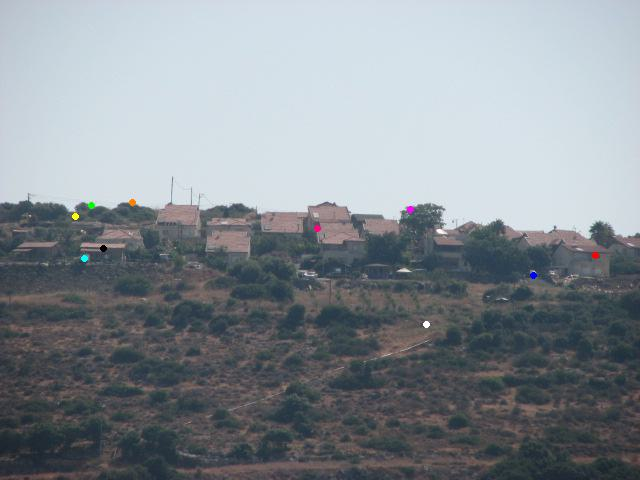

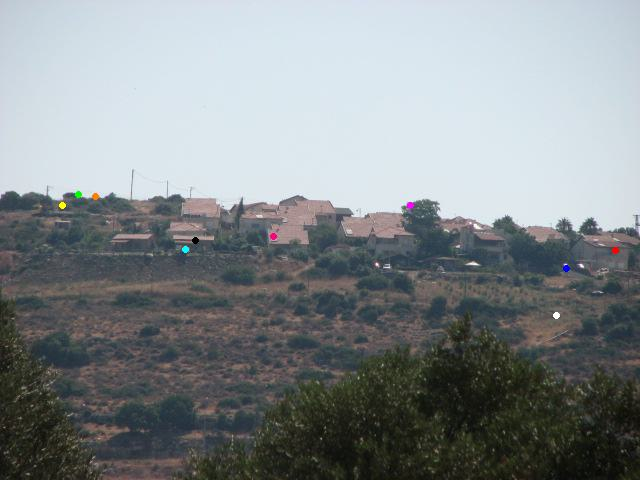

Hananya resutls: We can see that most dots appear to be in place, excluding the pink dot is a bit far. They are both on similar terrains (either a roof or the border between a bush and the sky which made it hard to classify)

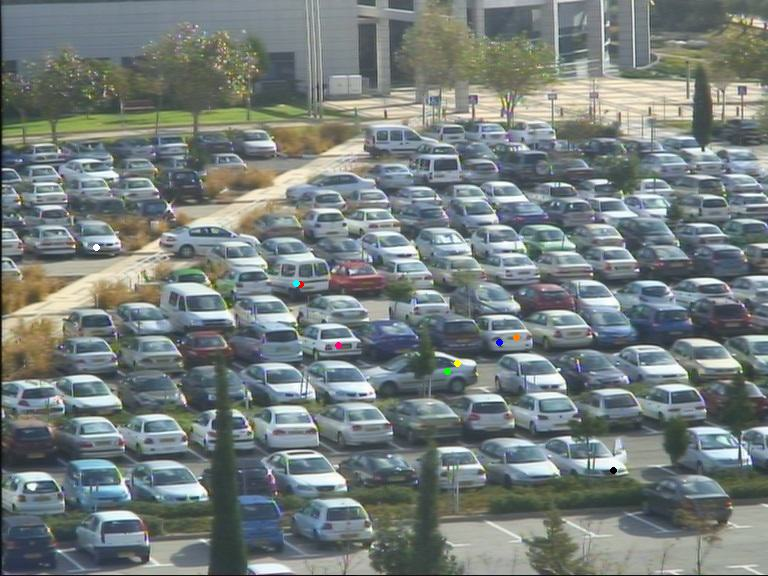

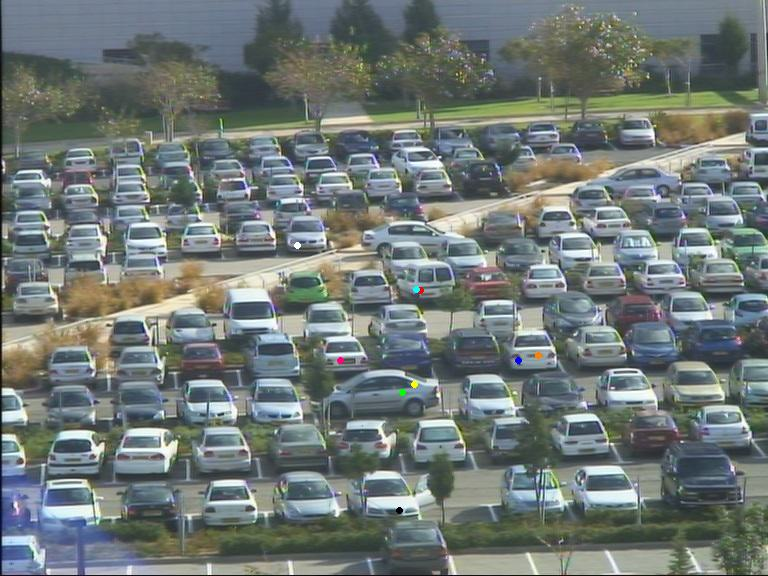

Hashaml resutls: We can see that all dots are in place. The purple dot is not present since index 2334 and 2335 share the same x,y coordinates and the same nighbor coordinates (2449 and 2450)

<a href="#top">Back to top<a>

<p id="3.3"><h2>6. The comparison between the results of the KNN and the results of the ANN</h2></p>
<p id="3.3.1"><h3>running time</h3></p>
Graphical presentation of the different running times. In order to allow a graphic display if the time differences are relatively large, we use Log function on it so that they can be displayed

For Hananya :


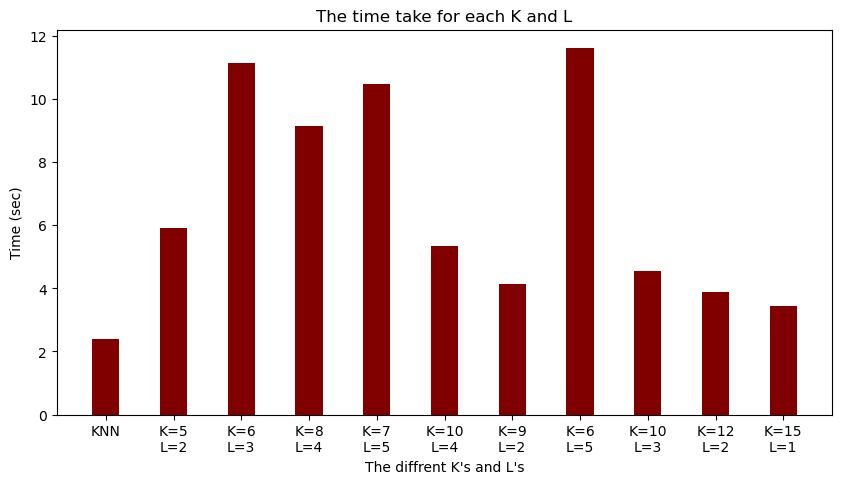

For Hashmal :


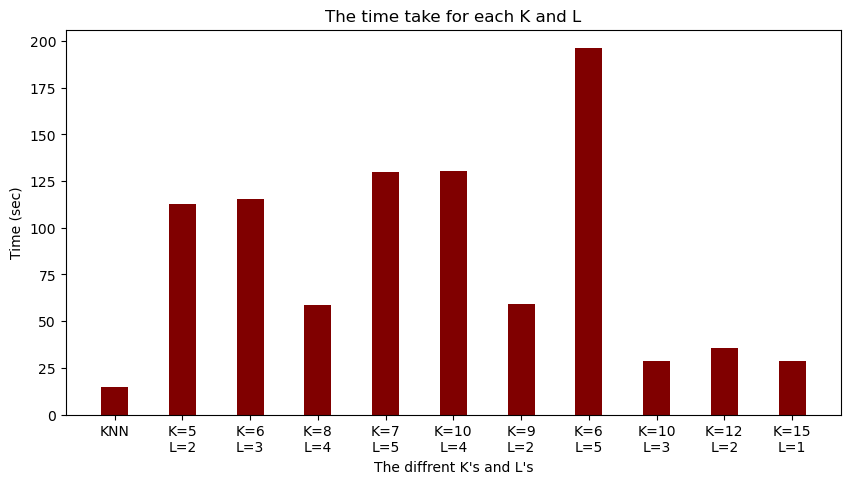

In [18]:
for j in range(len(data_list)):
    print('For',data_list[j][2],':')
    time_data={}
    if(max(time_list[j])>min(time_list[j])+200):
        # if the time differences are relatively large they will be logged
        if(time_knn[j]==0.0):
            time_data={'KNN':0}
        else:
            time_data={'KNN':abs(math.log(time_knn[j]))}
        for i in range(len(time_list[j])):
            if(time_list[j][i]==0.0):
                time_data['K='+str(K_list[i])+'\n'+'L='+str(L_list[i])]=0
            else:
                time_data['K='+str(K_list[i])+'\n'+'L='+str(L_list[i])]=abs(math.log(time_list[j][i]))
        print("The results were converted to a logarithm because the distances between them are so high that some of them will not be seen at all in the plot")
        ylabel='log(Time (sec))'
    else:
        #if the time differences are relatively small
        time_data={'KNN':time_knn[j]}
        for i in range(len(time_list[j])):
            time_data['K='+str(K_list[i])+'\n'+'L='+str(L_list[i])]=time_list[j][i]
        ylabel='Time (sec)'

    KL=list(time_data.keys())#Defining the names on the x-axis
    times=list(time_data.values())#Setting the height of the columns
    fig = plt.figure(figsize = (10, 5))#define the size
    plt.bar(KL, times, color ='maroon',width = 0.4)# creating the bar plot
    #Naming the axes and the plot:
    plt.xlabel("The diffrent K's and L's")
    plt.ylabel(ylabel)
    plt.title("The time take for each K and L")
    plt.show()

<p id="3.3.2"><h3>Comparing errors</h3></p>
Graphical presentation of the various errors. In order to allow a graphic display if the time differences are relatively large, we use Log function on it so that they can be displayed

For Hananya :


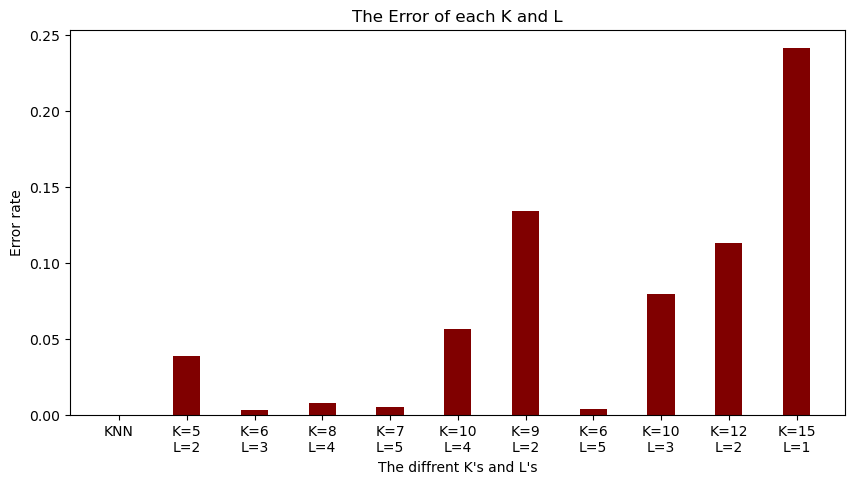

For Hashmal :


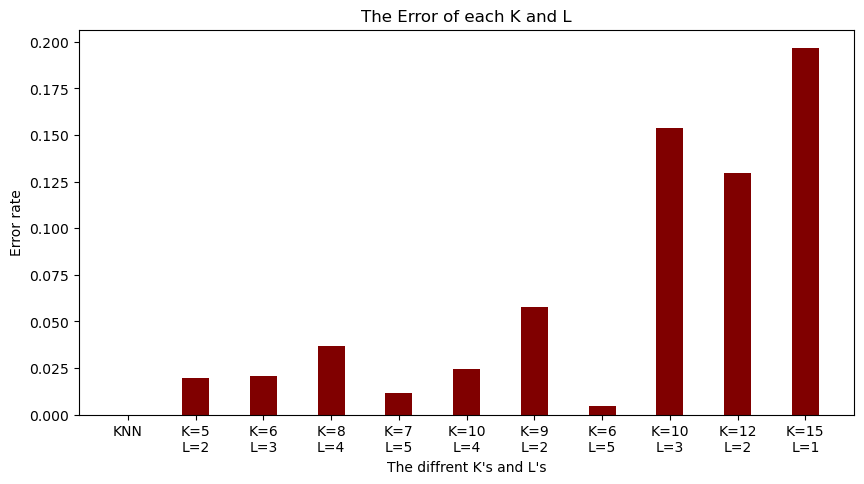

In [19]:
for j in range(len(data_list)):
    print('For',data_list[j][2],':')
    err_data={}
    err_data['KNN']=0
    if(max(err_list[j])>min(err_list[j])+2):
        #if the time differences are relatively large they will be logged
        for i in range(0,len(err_list[j])):
            if(err_list[j][i]==0.0):
                err_data['K='+str(K_list[i])+'\n'+'L='+str(L_list[i])]=0
            else:
                err_data['K='+str(K_list[i])+'\n'+'L='+str(L_list[i])]=abs(math.log(err_list[j][i]))
        print("The results were converted to a logarithm because the distances between them are so high that some of them will not be seen at all in the plot")
        ylabel='log(Error rate)'
    else:
        #if the time differences are relatively small
        for i in range(0,len(err_list[j])):
            err_data['K='+str(K_list[i])+'\n'+'L='+str(L_list[i])]=err_list[j][i]
        ylabel='Error rate'

    KL=list(err_data.keys())#Defining the names on the x-axis
    errors=list(err_data.values())#Setting the height of the columns
    fig = plt.figure(figsize = (10, 5))#define the size
    plt.bar(KL, errors, color ='maroon',width = 0.4)# creating the bar plot
    #Naming the axes and the plot:
    plt.xlabel("The diffrent K's and L's")
    plt.ylabel(ylabel)
    plt.title("The Error of each K and L")
    plt.show()

<a href="#top">Back to top<a>

<p id="4"><h1>Task D - comparing the results with the model in the sklearn library</h1></p>

In [20]:
best_Leaf=[0,0] #two varaiables, one for each dataset
best_pythonKnn_results=[]
best_time_pythonKnn=[1000000,1000000]
best_err_pythonKnn=[10000000,1000000]
Leaf_list_pythonKnn=[10,30,15,20,25,30,35,40,45,50]
error_list_pythonKnn=[[],[]]
time_list_pythonKnn=[[],[]]

for j in range(len(data_list)): #running on both datasets
    for i in range(0,10):
        pythonKnn = KNeighborsClassifier(n_neighbors=1, algorithm = 'kd_tree', leaf_size = Leaf_list_pythonKnn[i], weights='uniform')
        pythonKnn.fit(data_list[j][0].iloc[:,6:], data_list[j][0].iloc[:,5])
        st=time.time()
        pythonKnnResult = pythonKnn.kneighbors(data_list[j][1].iloc[:,6:134], return_distance = True)
        pythonKnnResult = pd.concat([pd.DataFrame(pythonKnnResult[1]), pd.DataFrame(pythonKnnResult[0])], axis=1)
        et=time.time()
        _time=et-st
        err=error_calculation(pythonKnnResult,knn_results[0])
        if(err<best_err_pythonKnn[j] or (err==best_err[j] and _time<best_time_pythonKnn[j])):
            #Saving the results with the lowest error (if the error is the same will take the best time)
            best_Leaf[j]=Leaf_list_pythonKnn[i]
            best_pythonKnn_results=pythonKnnResult 
            best_time_pythonKnn[j]=_time
            best_err_pythonKnn[j]=err
        error_list_pythonKnn[j].append(err)#Adding the current error to the list of errors
        time_list_pythonKnn[j].append(_time)#Adding the current time to the list of times
    annResultsDF = {'k':1, 'Leaf':Leaf_list_pythonKnn, 'Run Time':time_list_pythonKnn[j], 'Error':error_list_pythonKnn[j]}
    annResultsDF = pd.DataFrame(annResultsDF)
    print('For',data_list[j][2],':')
    display(annResultsDF)

For Hananya :


,k,Leaf,Run Time,Error
0,1,10,0.388960,0.0
1,1,30,0.162535,0.0
2,1,15,0.228389,0.0
3,1,20,0.221405,0.0
4,1,25,0.161568,0.0
5,1,30,0.162550,0.0
6,1,35,0.155509,0.0
7,1,40,0.163535,0.0
8,1,45,0.160572,0.0
9,1,50,0.142619,0.0


For Hashmal :


,k,Leaf,Run Time,Error
0,1,10,7.305479,0.025111
1,1,30,4.988690,0.025111
2,1,15,6.919471,0.025111
3,1,20,4.734342,0.025111
4,1,25,4.775232,0.025111
5,1,30,4.812105,0.025111
6,1,35,3.767898,0.025111
7,1,40,3.816795,0.025111
8,1,45,3.732027,0.025111
9,1,50,3.813830,0.025111


In [21]:
for j in range(len(data_list)): #running on both datasets
    print('For',data_list[j][2],':')
    print('The best Leaf size=',best_Leaf[j])
    print('With error of: ',round(best_err_pythonKnn[j], 6))
    print('And with time of: ',round(best_time_pythonKnn[j], 4))
    print('They will give the results:')
    display(best_pythonKnn_results.head())

For Hananya :
The best Leaf size= 10
With error of:  0.0
And with time of:  0.389
They will give the results:


,0,0
0,2271,272.209478
1,3215,408.286664
2,13,399.772435
3,3195,350.346971
4,3268,276.604411


For Hashmal :
The best Leaf size= 10
With error of:  0.025111
And with time of:  7.3055
They will give the results:


,0,0
0,2271,272.209478
1,3215,408.286664
2,13,399.772435
3,3195,350.346971
4,3268,276.604411


Comparing the results between Sklearn and LSH ANN

The below graphs show the comparison in error, one graph for Hananya and one for Hashmal

For Hananya :


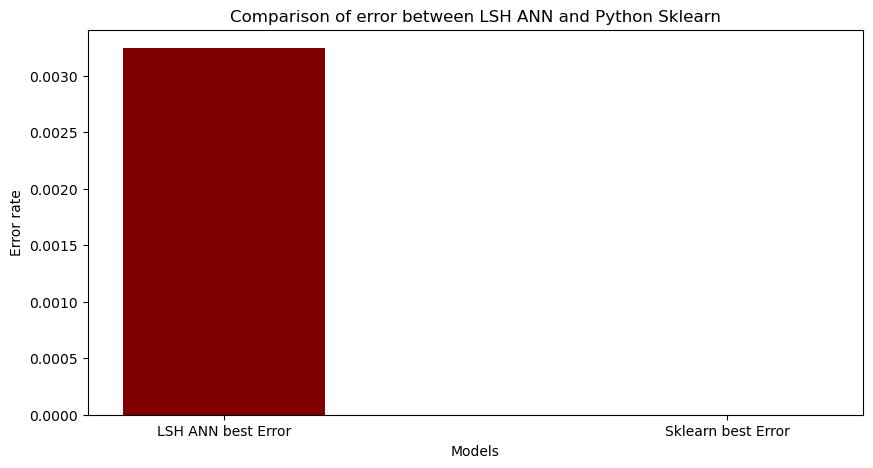

For Hashmal :


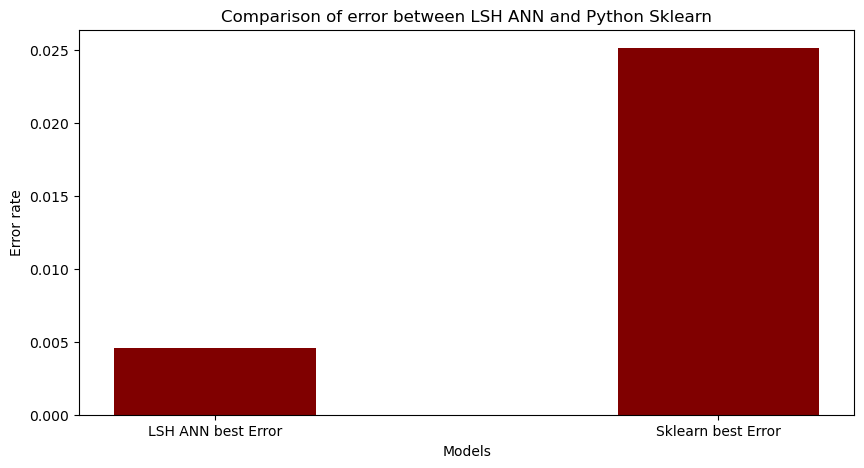

In [22]:
for j in range(len(data_list)):
    print('For',data_list[j][2],':')
    err_data={}
    if(best_err[j]>best_err_pythonKnn[j]+2):
        #if the time differences are relatively large they will be logged
        if(best_err[j]==0.0):
            err_data['LSH ANN best Error']=0
        else:
            err_data['LSH ANN best Error']=abs(math.log(best_err[j]))
        if(best_err_pythonKnn[j]==0.0):
            err_data['Sklearn best Error']=0
        else:
            err_data['Sklearn best Error']=abs(math.log(best_err_pythonKnn[j]))
        print("The results were converted to a logarithm because the distances between them are so high that some of them will not be seen at all in the plot")
        ylabel='log(Error rate)'
    else:
        #if the time differences are relatively small
        err_data['LSH ANN best Error']=best_err[j]
        err_data['Sklearn best Error']=best_err_pythonKnn[j]
        ylabel='Error rate'

    KL=list(err_data.keys())#Defining the names on the x-axis
    errors=list(err_data.values())#Setting the height of the columns
    fig = plt.figure(figsize = (10, 5))#define the size
    plt.bar(KL, errors, color ='maroon',width = 0.4)# creating the bar plot
    #Naming the axes and the plot:
    plt.xlabel("Models")
    plt.ylabel(ylabel)
    plt.title("Comparison of error between LSH ANN and Python Sklearn")
    plt.show()

The below graphs show the comparison in run time, one graph for Hananya and one for Hashmal

For Hananya :


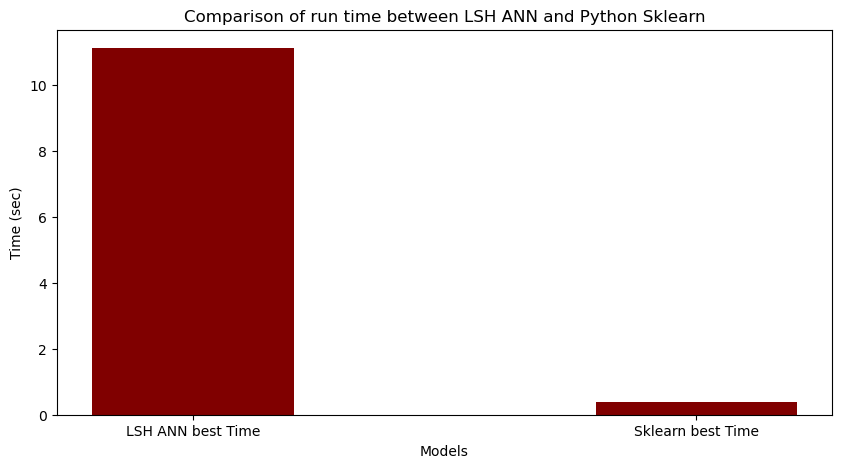

For Hashmal :


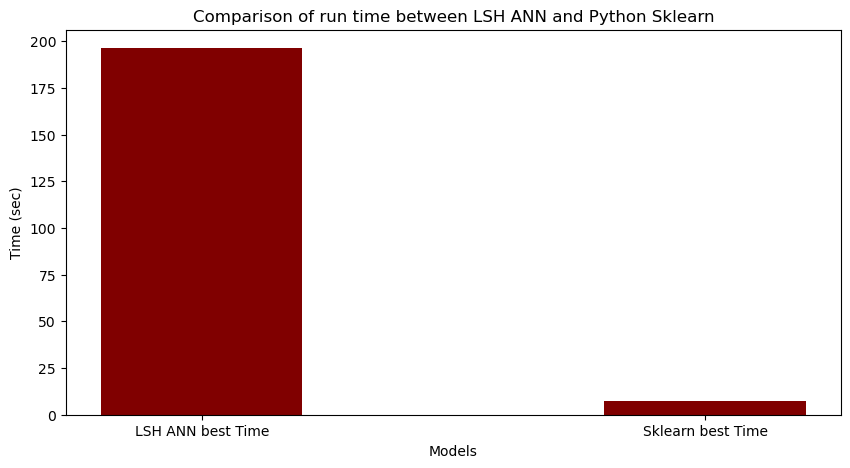

In [23]:
for j in range(len(data_list)):
    print('For',data_list[j][2],':')
    time_data={}
    if(best_time[j]>best_time_pythonKnn[j]+200):
        # if the time differences are relatively large they will be logged
        if(best_time[j]==0.0):
            time_data['LSH ANN best Time']=0
        else:
            time_data['LSH ANN best Time']=abs(math.log(best_time[j]))
        if(best_time_pythonKnn[j]==0.0):
            time_data['Sklearn best Time']=0
        else:
            time_data['Sklearn best Time']=abs(math.log(best_time_pythonKnn[j]))
        print("The results were converted to a logarithm because the distances between them are so high that some of them will not be seen at all in the plot")
        ylabel='log(Time (sec))'
    else:
        #if the time differences are relatively small
        time_data['LSH ANN best Time']=best_time[j]
        time_data['Sklearn best Time']=best_time_pythonKnn[j]
        ylabel='Time (sec)'

    KL=list(time_data.keys())#Defining the names on the x-axis
    times=list(time_data.values())#Setting the height of the columns
    fig = plt.figure(figsize = (10, 5))#define the size
    plt.bar(KL, times, color ='maroon',width = 0.4)# creating the bar plot
    #Naming the axes and the plot:
    plt.xlabel("Models")
    plt.ylabel(ylabel)
    plt.title("Comparison of run time between LSH ANN and Python Sklearn")
    plt.show()

<a href="#top">Back to top<a>

<p id="5"><h1>Task E - predicting the image from which the point was taken</h1></p>
Creating an ANN whose training information comes from Hananya1 and Hashmal1 and after that we will run the ANN on Hanania2 and hashmal2 and try to check if the results were obtained from the corresponding image

In [24]:
#create the training data consisting of the two pictures SIFT values
concat_data1=pd.concat([Hananya1,Hashmal1]).reset_index(drop=True)
concat_data1['label']=concat_data1.index.values
#reseting the label
concat_data2=pd.concat([Hananya2,Hashmal2]).reset_index(drop=True)
concat_data2['label']=concat_data2.index.values

display(concat_data1.head())
display(concat_data2.head())

,Y,X,scale,angle,classification,label,feature1,feature2,feature3,feature4,...,feature119,feature120,feature121,feature122,feature123,feature124,feature125,feature126,feature127,feature128
0,191.63,281.10,20.79,1.545,Hananya,0,65,7,0,0,...,0,7,0,0,0,0,1,1,0,0
1,195.73,41.28,6.35,1.458,Hananya,1,52,12,0,0,...,1,18,0,0,0,0,0,0,5,0
2,196.50,150.37,9.14,1.441,Hananya,2,60,15,1,1,...,0,1,7,0,0,0,0,0,0,2
3,198.02,23.67,1.93,1.870,Hananya,3,72,9,0,0,...,23,48,7,0,0,0,0,0,1,10
4,198.24,24.35,1.71,1.845,Hananya,4,80,20,0,0,...,26,53,9,1,0,0,0,0,0,15


,Y,X,scale,angle,classification,label,feature1,feature2,feature3,feature4,...,feature119,feature120,feature121,feature122,feature123,feature124,feature125,feature126,feature127,feature128
0,193.17,371.13,22.83,1.571,Hananya,0,46,13,0,0,...,0,24,0,0,0,10,3,0,0,0
1,331.15,543.32,18.86,1.099,Hananya,1,15,105,32,1,...,0,0,1,12,2,0,0,0,0,0
2,253.43,525.48,21.01,1.512,Hananya,2,47,67,0,0,...,0,5,50,7,2,3,0,0,0,0
3,236.15,239.20,21.35,1.502,Hananya,3,11,6,0,0,...,0,39,87,3,0,0,0,0,0,10
4,201.21,471.74,19.79,1.411,Hananya,4,78,31,0,0,...,0,0,0,1,2,17,0,0,0,0


We will now run LSH ANN with k=3 with predict() function and calculate the accuracy

In [25]:
concatAnn=ANN(k=3,K=best_K[1],L=best_L[1])
concatAnn.fit(X=concat_data1.iloc[:,6:],Y=concat_data1.iloc[:,:6])
res=concatAnn.predict(concat_data2)
res.head()

,verdict
0,Hananya
1,Hashmal
2,Hananya
3,Hananya
4,Hananya


In [26]:
verdict = res.join(concat_data2['classification'])#i'm missing here the dataframe from ANN, this is called prediction
#calculate accuracy = number of correct classifications / total samples
accuracy = len(verdict[(verdict['verdict'] == verdict['classification'])])/len(verdict.index)
print('The accuracy is:',round(accuracy,3))

The accuracy is: 0.791


<a href="#top">Back to top<a>

<p id="b"><h1>Bonus</h1></p>
<p id="b1"><h2>ANN implementation using the KDTREE method</h2></p>

<p id="1.2"><h2>ANN</h2></p>
The implementation of ANN using the KD Tree method<br><ol><li>L = Nubmer of KD Tress to build the model on</li><li>leaf_size = max number of data rows in a node, defult = 30</li><li>k = number of nearest neighbours to return</li><li>treesArray = array to save all KD tree roots, based on value L</li></ol>
Explanation of the functions:
<ol>
    <li><strong>__init__</strong>- constructor, defines L, leaf size (N0) as required</li><br>
    <br><li><strong>fit</strong> - receives the training information and build L KD Tress, using KDNode Class and buildKDTree. The method returs the model<br>
        <br><li><strong>buildKDTree</strong> - builds a single KD Tree</li>
    <br><li><strong>kneighbors</strong> - receives information for testing and checks in it who are the k closest neighbors to it from the training information.
    <br>Note: returns the index of the training data + the distance from that data.
    <br>Implementation by findN, for each sample we get the apporoximate neighbors<br>All neighbors from all trees are reviewed with Euclidean distance. We sort and then keep the k neighbors in the "results" dataframe which will be returned to the user<br></li>
    <br><li><strong>findN</strong> - method to retrieve a ANN from a single KD Tree</li>
    <br><li><strong>calcError</strong> - method to calcuate the error between KNN and this ANN model</li>
    <br><li><strong>predict</strong> - method that returns for a list of indexes (given as a dataframe) which image they correspond to.</li>
<ol>

In [27]:
class KDANN:
    
    def __init__(self, data, L, leaf_size=5):
        self.leaf_size = leaf_size
        self.data = data
        self.L = L
        self.treesArray=[]
    
    def fit(self, X):
        treesArray = []
        for i in range(self.L):
            current = KDNode(X) #creaete the node with all data in the root
            self.buildKDTree(current)
            treesArray.append(current) #add the tree to the list
        self.treesArray=treesArray
    
    def buildKDTree(self, root):
        if len(root.data) <= self.leaf_size: #stop if we've reached the leaf size or less
            return
        root.median = self.data.iloc[:,root.feature].median(axis=0) #calcualte the median of the randomly chosen feature
        minValue = self.data.iloc[:,root.feature].min()
        #in case all the feature values are equal we want to split the list and not have a leaf with no data
        if root.median == minValue:
            leftNode = KDNode(root.data.iloc[:int((len(root.data.index)/2))])
            rightNode = KDNode(root.data.iloc[int((len(root.data.index)/2)):])
        else:
            leftNode = KDNode(root.data[root.data.iloc[:,root.feature] <= root.median])
            rightNode = KDNode(root.data[root.data.iloc[:,root.feature] > root.median])
        root.left = leftNode
        root.right = rightNode
        #recursive call to build the tree
        self.buildKDTree(root.left)
        self.buildKDTree(root.right)
     
    def kneighbors(self, n, k=2):
        results = pd.DataFrame()
        current = np.empty((0, len(n.columns)), float)
        #the below loop is taking each row in the data and calculating the K nearest kneighbors, one data row at a time
        for rowNum in range(len(n.index)): #run on all data, row by row
            for i in range(self.L): #run on all KD trees
                #adding all values to the same numpay array
                current = np.vstack((current, self.findN(self.treesArray[i], n[rowNum:rowNum+1]).to_numpy()))
            test = n[rowNum:rowNum+1].to_numpy()
            test = test[0:1,6:].astype(np.single)
            nearest = pd.DataFrame(cdist(current[:,6:].astype(np.int32),test,'euclidean')) #calc euclidean distance
            nearest.insert(0, 'neighbour', current[:,5:6]) #add labels
            nearest.rename(columns={0 :'distance'}, inplace=True)
            nearest = nearest.sort_values(by='distance') #sort all neighbors by distance
            nearest = nearest.drop_duplicates().head(k).stack().to_frame().reset_index(level=0,drop=True).T #keep the closest k neighbors
            results = pd.concat([results, nearest]) #add nearest neighbors to results DF
            current = np.empty((0, len(n.columns)), float) #initialize the numpy array
        results = results.reset_index(level=0, drop=True)
        return results
    
    def findN(self, root, n):
        while(root.left != None):
            if n.iloc[0][root.feature] <= root.median:
                root = root.left
            else:
                root = root.right
        return root.data
        
    def calcError(self, ann, knn):
        ann['distance'] = ann['distance'].fillna(0)
        error = 0
        for i in range (len(ann.index)):
            error = error + (ann.iloc[i][1]/knn.iloc[i][1]-1)
        error = round(error/len(ann.index),3)
        return error
    
    def predict(self,df2,classes=None):
        #args:df2-to predict df, classes-a list of possibol classifications
        if(classes==None):
            classes=list(set(self.df.classification.values))#finding all possibol classes if not given
        nearest, count = self.kneighbors(df2)#find neighbors
        end=len(nearest.columns)
        label_to_class = pd.Series(self.df.classification.values, index=self.df.label).to_dict()
        nearest = nearest.replace({'neighbour': label_to_class})#add labels
        for cal in classes:
            nearest[cal] = nearest.apply(lambda row: sum(row[0:-1]==cal) ,axis=1)#counting how many from each class
        nearest['verdict'] =nearest.iloc[:,end:].idxmax(axis=1)#find which class is the max
        return pd.DataFrame(nearest['verdict'])

Second Class to define the KDTree Node

In [28]:
class KDNode:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.feature = random.randint(6,133) #randomly choose a feature
        self.median = None
        self.data = data

<a href="#top">Back to top<a>

<p id="b2"><h1>Running ANN:</h1></p>
<p id="b2.1"><h2>Run for different pairs of N0 and L0</h2></p>
Run the ANN for different K and L, including calculating the error for each pair and timing 10 runs (and calculating the average time) and comparing against the previous ones to find the best one. Note: k=1 in all of them.</p>
<a href="#b2.1.1">click here to see the best<a>

In [29]:
best_L0=[0,0]
best_leaf_size=[0,0]
best_ANN_results=[]
best_time=[10000000,1000000]
best_err=[10000000,1000000]
Leaf_size_list=[10,10,10,10,30,30,30,30,50,50]
L0_list=[1,3,4,5,2,6,8,6,4,10]
err_list=[[],[]]
time_list=[[],[]]

for j in range(len(data_list)):
    for i in range(0,10):
        myKdAnn=KDANN(data_list[j][0],L0_list[i],leaf_size=Leaf_size_list[i])
        myKdAnn.fit(data_list[j][0].copy())
        st=time.time()
        results=myKdAnn.kneighbors(data_list[j][1], k=1)
        et=time.time()
        _time=et-st
        err = myKdAnn.calcError(results, knn_results[j])
        #err=error_calculation(results,knn_results)
        if (err<best_err[j] or (err==best_err[j] and _time<best_time[j])):
            #Saving the results with the lowest error (if the error is the same will take the best time)
            best_L0[j]=L0_list[i]
            best_leaf_size[j]=Leaf_size_list[i]
            best_ANN_results.append(results)
            best_time[j]=_time
            best_err[j]=err
        err_list[j].append(err)#Adding the current error to the list of errors
        time_list[j].append(_time)#Adding the current time to the list of times
    KDannResultsDF = {'L':L0_list, 'Leaf':Leaf_size_list, 'Run Time':time_list[j], 'Error':err_list[j]}
    print('For',data_list[j][2],':')
    KDannResultsDF = pd.DataFrame(KDannResultsDF)
    display(KDannResultsDF)

For Hananya :


,L,Leaf,Run Time,Error
0,1,10,3.781856,0.304
1,3,10,7.584694,0.167
2,4,10,7.709422,0.125
3,5,10,8.953067,0.094
4,2,30,4.770272,0.131
5,6,30,9.136571,0.035
6,8,30,11.342669,0.028
7,6,30,9.187430,0.039
8,4,50,6.894566,0.044
9,10,50,13.455024,0.012


For Hashmal :


,L,Leaf,Run Time,Error
0,1,10,18.504528,0.367
1,3,10,32.530018,0.203
2,4,10,39.940210,0.175
3,5,10,47.198802,0.144
4,2,30,26.696617,0.174
5,6,30,51.415527,0.079
6,8,30,63.844270,0.058
7,6,30,50.431128,0.078
8,4,50,38.112125,0.087
9,10,50,78.296684,0.035


<p id="b2.1.1"><h3>The best results</h3></p>

In [30]:
for j in range(len(data_list)):
    print('For',data_list[j][2],':')
    print('The best leaf size=',best_leaf_size[j],' and The best L0=',best_L0[j])
    print('With error of: ',best_err[j])
    print('And with time of: ',round(best_time[j],1))
    print('They will give the results:')
    display(best_ANN_results[j].head())

For Hananya :
The best leaf size= 50  and The best L0= 10
With error of:  0.012
And with time of:  13.5
They will give the results:


,neighbour,distance
0,0,124.390514
1,89,351.290478
2,492,375.522303
3,301,191.031411
4,13,117.813412


For Hashmal :
The best leaf size= 50  and The best L0= 10
With error of:  0.035
And with time of:  78.3
They will give the results:


,neighbour,distance
0,0,124.390514
1,260,405.308524
2,95,206.741384
3,230,183.472069
4,13,117.813412


<a href="#top">Back to top<a>

<p id="b2.2"><h2>Calculate the ratio and display the results on the images</h2></p>
We will run an ANN with the best K and L we found and k=2, and after that we calculat for each sample the ratio between its neighbors and cut the top 10

In [31]:
#method to calculate the ratio between the closest and the next closest neighbor. low ratio means we don't have a clear answer
def ratio_calc(prediction_ratio):
    prediction_ratio['ratio'] = prediction_ratio.iloc[:,1]/prediction_ratio.iloc[:,3]
    threshold = 0.8 #if the ratio is above the threshold then there is no close neighbour
    prediction_ratio['neighbour1'].mask(prediction_ratio['ratio'] > threshold, None, inplace = True)
    return prediction_ratio

In [32]:
#method to return the x and y coordinates of a sample, to be placed on the image itself
#original_df is the dataset from the csv file
#resultsList is the index list in order the find which sample to return
def get_xy(original_df,resultList):
    res=pd.DataFrame(columns=['index','Y','X'])
    for i in resultList:
        res.loc[len(res),'index']=i
        res.loc[len(res)-1,'X']=original_df.loc[i,'X']
        res.loc[len(res)-1,'Y']=original_df.loc[i,'Y'] 
    return res

In [33]:
prediction_ratio_list=[]
for j in range(len(data_list)):
    print('For',data_list[j][2],':')
    best_KD_ANN=KDANN(data_list[j][0], best_L0[j],leaf_size=best_leaf_size[j])
    best_KD_ANN.fit(data_list[j][0])
    prediction_ratio = best_KD_ANN.kneighbors(data_list[j][1], k=2)
    prediction_ratio.columns = ['neighbour1', 'distance1', 'neighbour2', 'distance2']
    prediction_ratio=ratio_calc(prediction_ratio)
    prediction_ratio=prediction_ratio.sort_values('ratio').drop(['neighbour2', 'distance2'], axis=1)
    prediction_ratio_list.append(prediction_ratio)
    display(prediction_ratio)

For Hananya :


,neighbour1,distance1,ratio
580,323,146.482081,0.435665
451,43,98.137658,0.545487
574,368,211.950466,0.579734
134,93,161.452779,0.584066
206,68,88.758098,0.594915
...,...,...,...
300,None,293.55749,0.999496
381,None,307.681654,0.999657
422,None,328.233149,0.999671
418,None,378.469285,0.9997


For Hashmal :


,neighbour1,distance1,ratio
2331,2446,69.79255,0.214011
3064,3172,92.363413,0.307273
1622,2343,113.507709,0.370097
2334,2449,139.892816,0.405136
2232,2368,133.0,0.407512
...,...,...,...
2444,None,293.395637,0.999924
756,None,337.176512,0.999934
1186,None,376.965516,0.999954
36,None,329.141307,0.999968


Explanation for the above resutls:
As we can see from the above dataframe, the farther the second closest neighbor is the lower the ratio results (closed to 0)
This means there is a higher diffirentiation between samples, meaning a higher certainty that we have found the correct matched pixel on both images

Finding x and y for all remaining samples

In [34]:
xy_list=[]
j=0
for prediction_ratio in prediction_ratio_list:
    prediction_ratio=prediction_ratio.iloc[:10,:]
    xy_results=get_xy(data_list[j][1],list(prediction_ratio.index)).reset_index(drop=True)
    xy_neighbour=get_xy(data_list[j][0],list(prediction_ratio.iloc[:,0])).reset_index(drop=True)
    xy_list.append(xy_neighbour)
    xy_list.append(xy_results)
    j=j+1

In [35]:
r=3
def x_top_left(x,img):
    #Checking that there is no deviation from the top left corner for x
    if(x-r<0):
        return 0
    return x-r
def x_button_right(x,img):
    #Checking that there is no deviation from the button right corner for x
    if(x+r>img.size[0]):
        return img.size[0]
    return x+r
def y_top_left(y,img):
    #Checking that there is no deviation from the top left corner for y
    if(y-r<0):
        return 0
    return y-r
def y_button_right(y,img):
    #Checking that there is no deviation from the button right corner for y
    if(y+r>img.size[1]):
        return img.size[1]
    return y+r

In [36]:
colors=[(255,0,0),(0,255,0),(0,0,255),(255,255,0),(255,0,255),
        (0,255,255),(0,0,0),(255,255,255),(255,127,0),(255,0,127)]
img_list=["Hananya1.jpg","Hananya2.jpg","Hashmal1.jpg","Hashmal2.jpg"]
j=0
for img_name in img_list:
    with Image.open(img_name) as img:
        draw = ImageDraw.Draw(img)
        #Adding the points on Hananya1
        xy_results=xy_list[j]
        for i in xy_results.index:
            x1=x_top_left(xy_results.loc[i,'X'],img)
            x2=x_button_right(xy_results.loc[i,'X'],img)
            y1=y_top_left(xy_results.loc[i,'Y'],img)
            y2=y_button_right(xy_results.loc[i,'Y'],img)
            draw.ellipse((x1,y1) + (x2,y2), fill=colors[i])

        img.show()
        name=img_name.split('.')
        sol_name=name[0]+"_sol2."+name[1]
        img.save(sol_name)
        print(sol_name ,'has been successfully saved in the folder')
        j=j+1

Hananya1_sol2.jpg has been successfully saved in the folder
Hananya2_sol2.jpg has been successfully saved in the folder
Hashmal1_sol2.jpg has been successfully saved in the folder
Hashmal2_sol2.jpg has been successfully saved in the folder


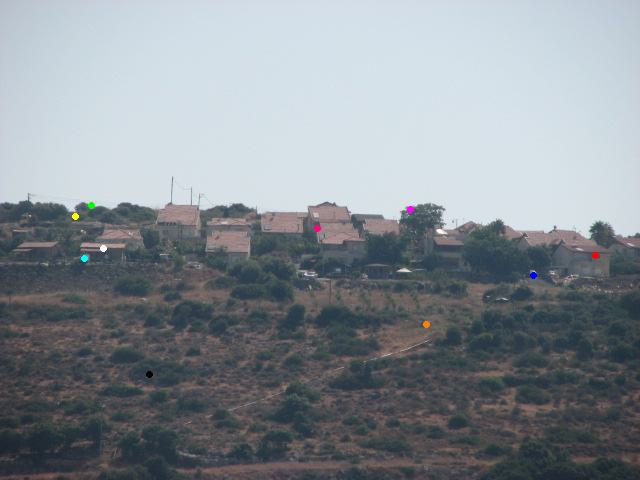

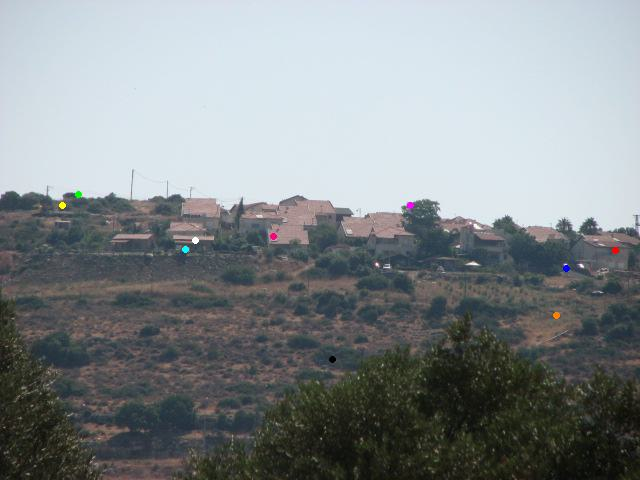

Hananya resutls: Similar to LSH, the pink dot is out of place

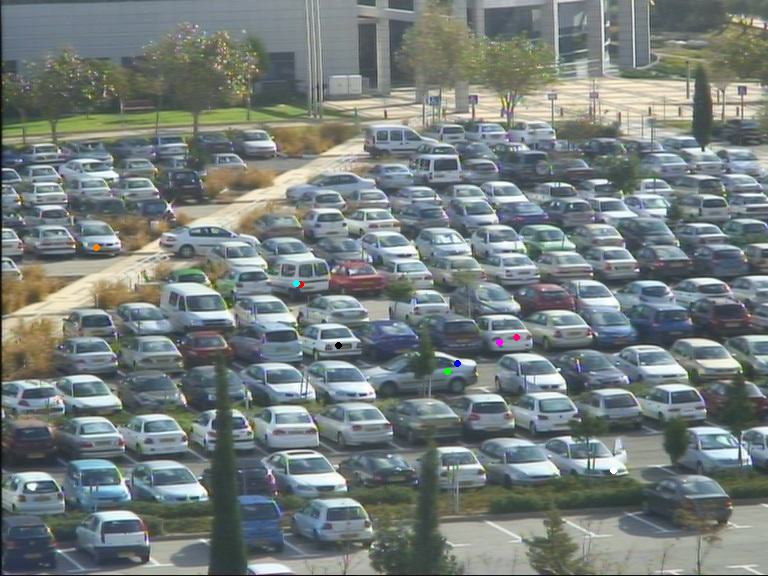

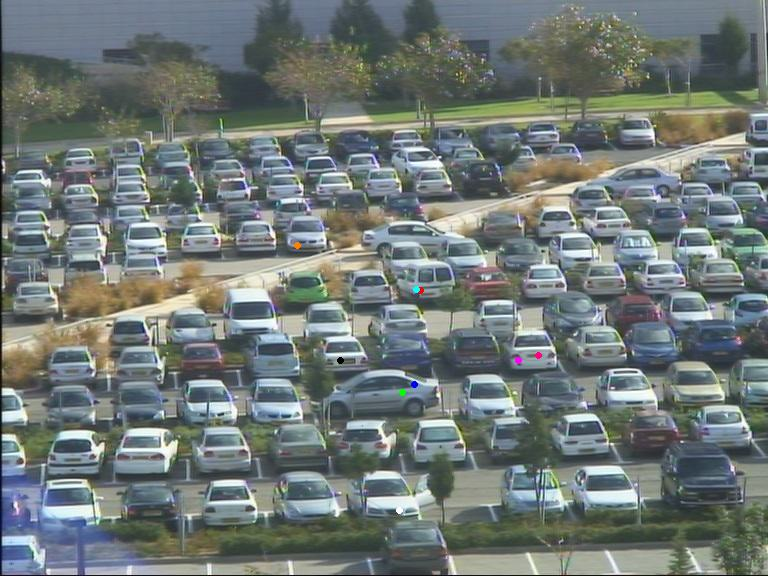

Hashaml resutls: We can see that all dots are in place. The black dot is not present since index 2334 and 2335 share the same x,y coordinates and the same nighbor coordinates (2449 and 2450) - same issue we've seen in LSH

Marking of the results on the images (in a circle with a radius of 3 pixels around the point so that they can be seen)

<a href="#top">Back to top<a>

<p id="b2.3"><h1>The comparison between the results of the KNN and the results of the ANN</h1></p>
<p id="b2.3.1"><h2>running time</h2></p>
Graphical presentation of the different running times. In order to allow a graphic display if the time differences are relatively large, we use Log function on it so that they can be displayed

For Hananya :


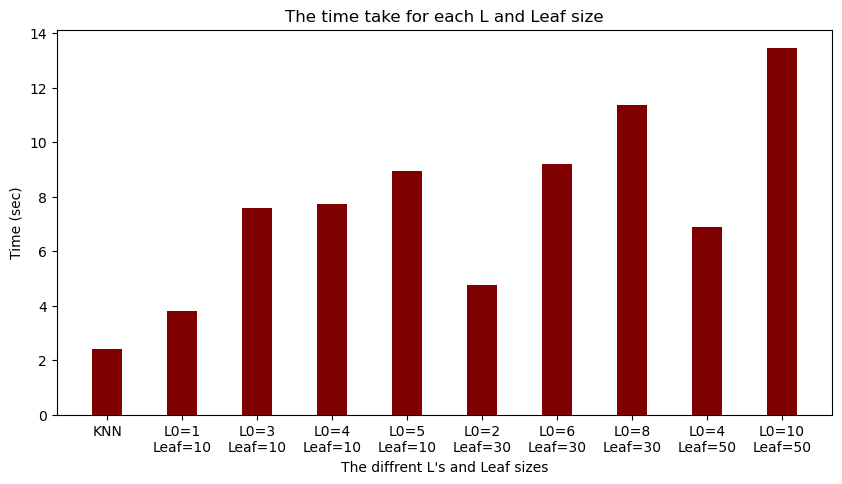

For Hashmal :


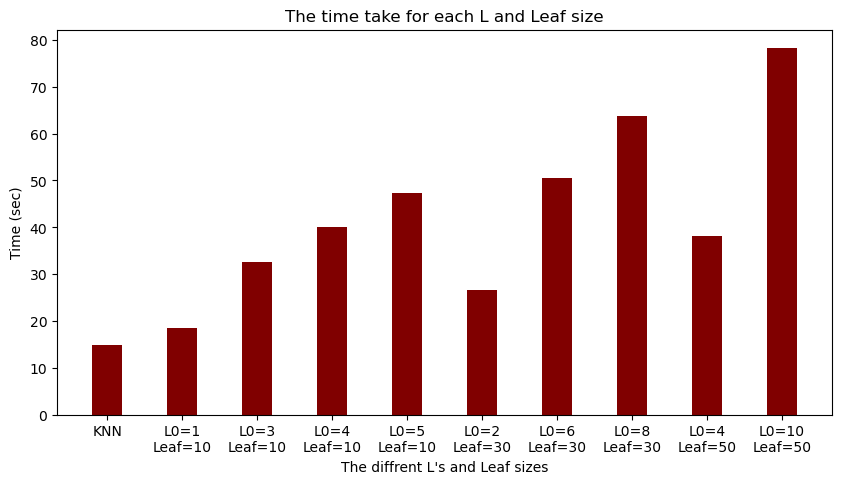

In [37]:
for j in range(len(data_list)):
    print('For',data_list[j][2],':')
    time_data={}
    if(max(time_list[j])>min(time_list[j])+200):
        # if the time differences are relatively large they will be logged
        if(time_knn[j]==0.0):
            time_data={'KNN':0}
        else:
            time_data={'KNN':abs(math.log(time_knn[j]))}
        for i in range(len(time_list[j])):
            if(time_list[j][i]==0.0):
                time_data['L0='+str(L0_list[i])+'\n'+'Leaf='+str(Leaf_size_list[i])]=0
            else:
                time_data['L0='+str(L0_list[i])+'\n'+'Leaf='+str(Leaf_size_list[i])]=abs(math.log(time_list[j][i]))
        print("The results were converted to a logarithm because the distances between them are so high that some of them will not be seen at all in the plot")
        ylabel='log(Time (sec))'
    else:
        #if the time differences are relatively small
        time_data={'KNN':time_knn[j]}
        for i in range(len(time_list[j])):
            time_data['L0='+str(L0_list[i])+'\n'+'Leaf='+str(Leaf_size_list[i])]=time_list[j][i]
        ylabel='Time (sec)'

    KL=list(time_data.keys())#Defining the names on the x-axis
    times=list(time_data.values())#Setting the height of the columns
    fig = plt.figure(figsize = (10, 5))#define the size
    plt.bar(KL, times, color ='maroon',width = 0.4)# creating the bar plot
    #Naming the axes and the plot:
    plt.xlabel("The diffrent L's and Leaf sizes")
    plt.ylabel(ylabel)
    plt.title("The time take for each L and Leaf size")
    plt.show()

<p id="b2.3.2"><h2>Comparing errors</h2></p>
Graphical presentation of the various errors. In order to allow a graphic display if the time differences are relatively large, we use Log function on it so that they can be displayed

For Hananya :


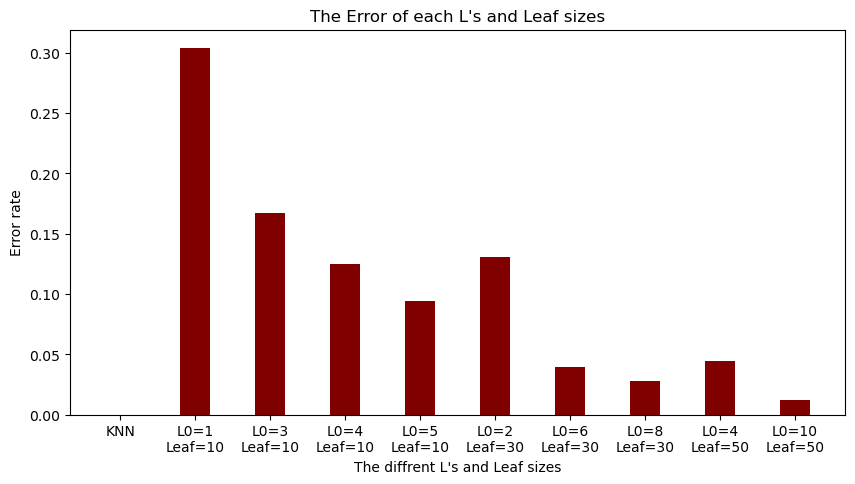

For Hashmal :


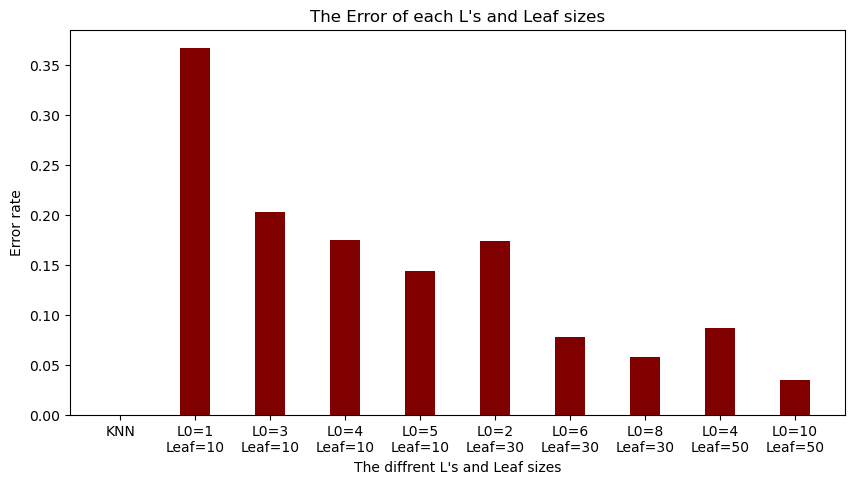

In [38]:
for j in range(len(data_list)):
    print('For',data_list[j][2],':')
    err_data={}
    err_data['KNN']=0
    if(max(err_list[j])>min(err_list[j])+2):
        #if the time differences are relatively large they will be logged
        for i in range(0,len(err_list[j])):
            if(err_list[j][i]==0.0):
                err_data['L0='+str(L0_list[i])+'\n'+'Leaf='+str(Leaf_size_list[i])]=0
            else:
                err_data['L0='+str(L0_list[i])+'\n'+'Leaf='+str(Leaf_size_list[i])]=abs(math.log(err_list[j][i]))
        print("The results were converted to a logarithm because the distances between them are so high that some of them will not be seen at all in the plot")
        ylabel='log(Error rate)'
    else:
        #if the time differences are relatively small
        for i in range(0,len(err_list[j])):
            err_data['L0='+str(L0_list[i])+'\n'+'Leaf='+str(Leaf_size_list[i])]=err_list[j][i]
        ylabel='Error rate'

    KL=list(err_data.keys())#Defining the names on the x-axis
    errors=list(err_data.values())#Setting the height of the columns
    fig = plt.figure(figsize = (10, 5))#define the size
    plt.bar(KL, errors, color ='maroon',width = 0.4)# creating the bar plot
    #Naming the axes and the plot:
    plt.xlabel("The diffrent L's and Leaf sizes")
    plt.ylabel(ylabel)
    plt.title("The Error of each L's and Leaf sizes")
    plt.show()

<a href="#top">Back to top<a>